# Dry Beans classification

## Importing data

In [51]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb

# bean_data dataframe
df = pd.read_csv("input/bean-data.csv") # there are no missing values
df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [52]:
df.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

The variable's description is as follows:

1. Area (`A`): The area of a bean zone and the number of pixels within its
   boundaries.
2. Perimeter (`P`): Bean circumference is defined as the length of its border.
3. Major axis length (`L`): The distance between the ends of the longest line
   that can be drawn from a bean.
4. Minor axis length (`l`): The longest line that can be drawn from the bean
   while standing perpendicular to the main axis.
5. Aspect ratio (`K`): Defines the relationship between L and l.
6. Eccentricity (`Ec`): Eccentricity of the ellipse having the same moments as
   the region.
7. Convex area (`C`): Number of pixels in the smallest convex polygon that can
   contain the area of a bean seed.
8. Equivalent diameter (`Ed`): The diameter of a circle having the same area as
   a bean seed area.
9. Extent (`Ex`): The ratio of the pixels in the bounding box to the bean area.
10. Solidity (`S`): Also known as convexity. The ratio of the pixels in the
    convex shell to those found in beans.
11. Roundness (`R`): Calculated with the following formula:
    `(4 * %pi * A) / (P^2)`
12. Compactness (`CO`): Measures the roundness of an object: `Ed / L`
13. ShapeFactor1 (`SF1`)
14. ShapeFactor2 (`SF2`)
15. ShapeFactor3 (`SF3`)
16. ShapeFactor4 (`SF4`)
17. Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

## Checking data

In [53]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

The dataset we have has no missing values.

### Scatterplot matrix

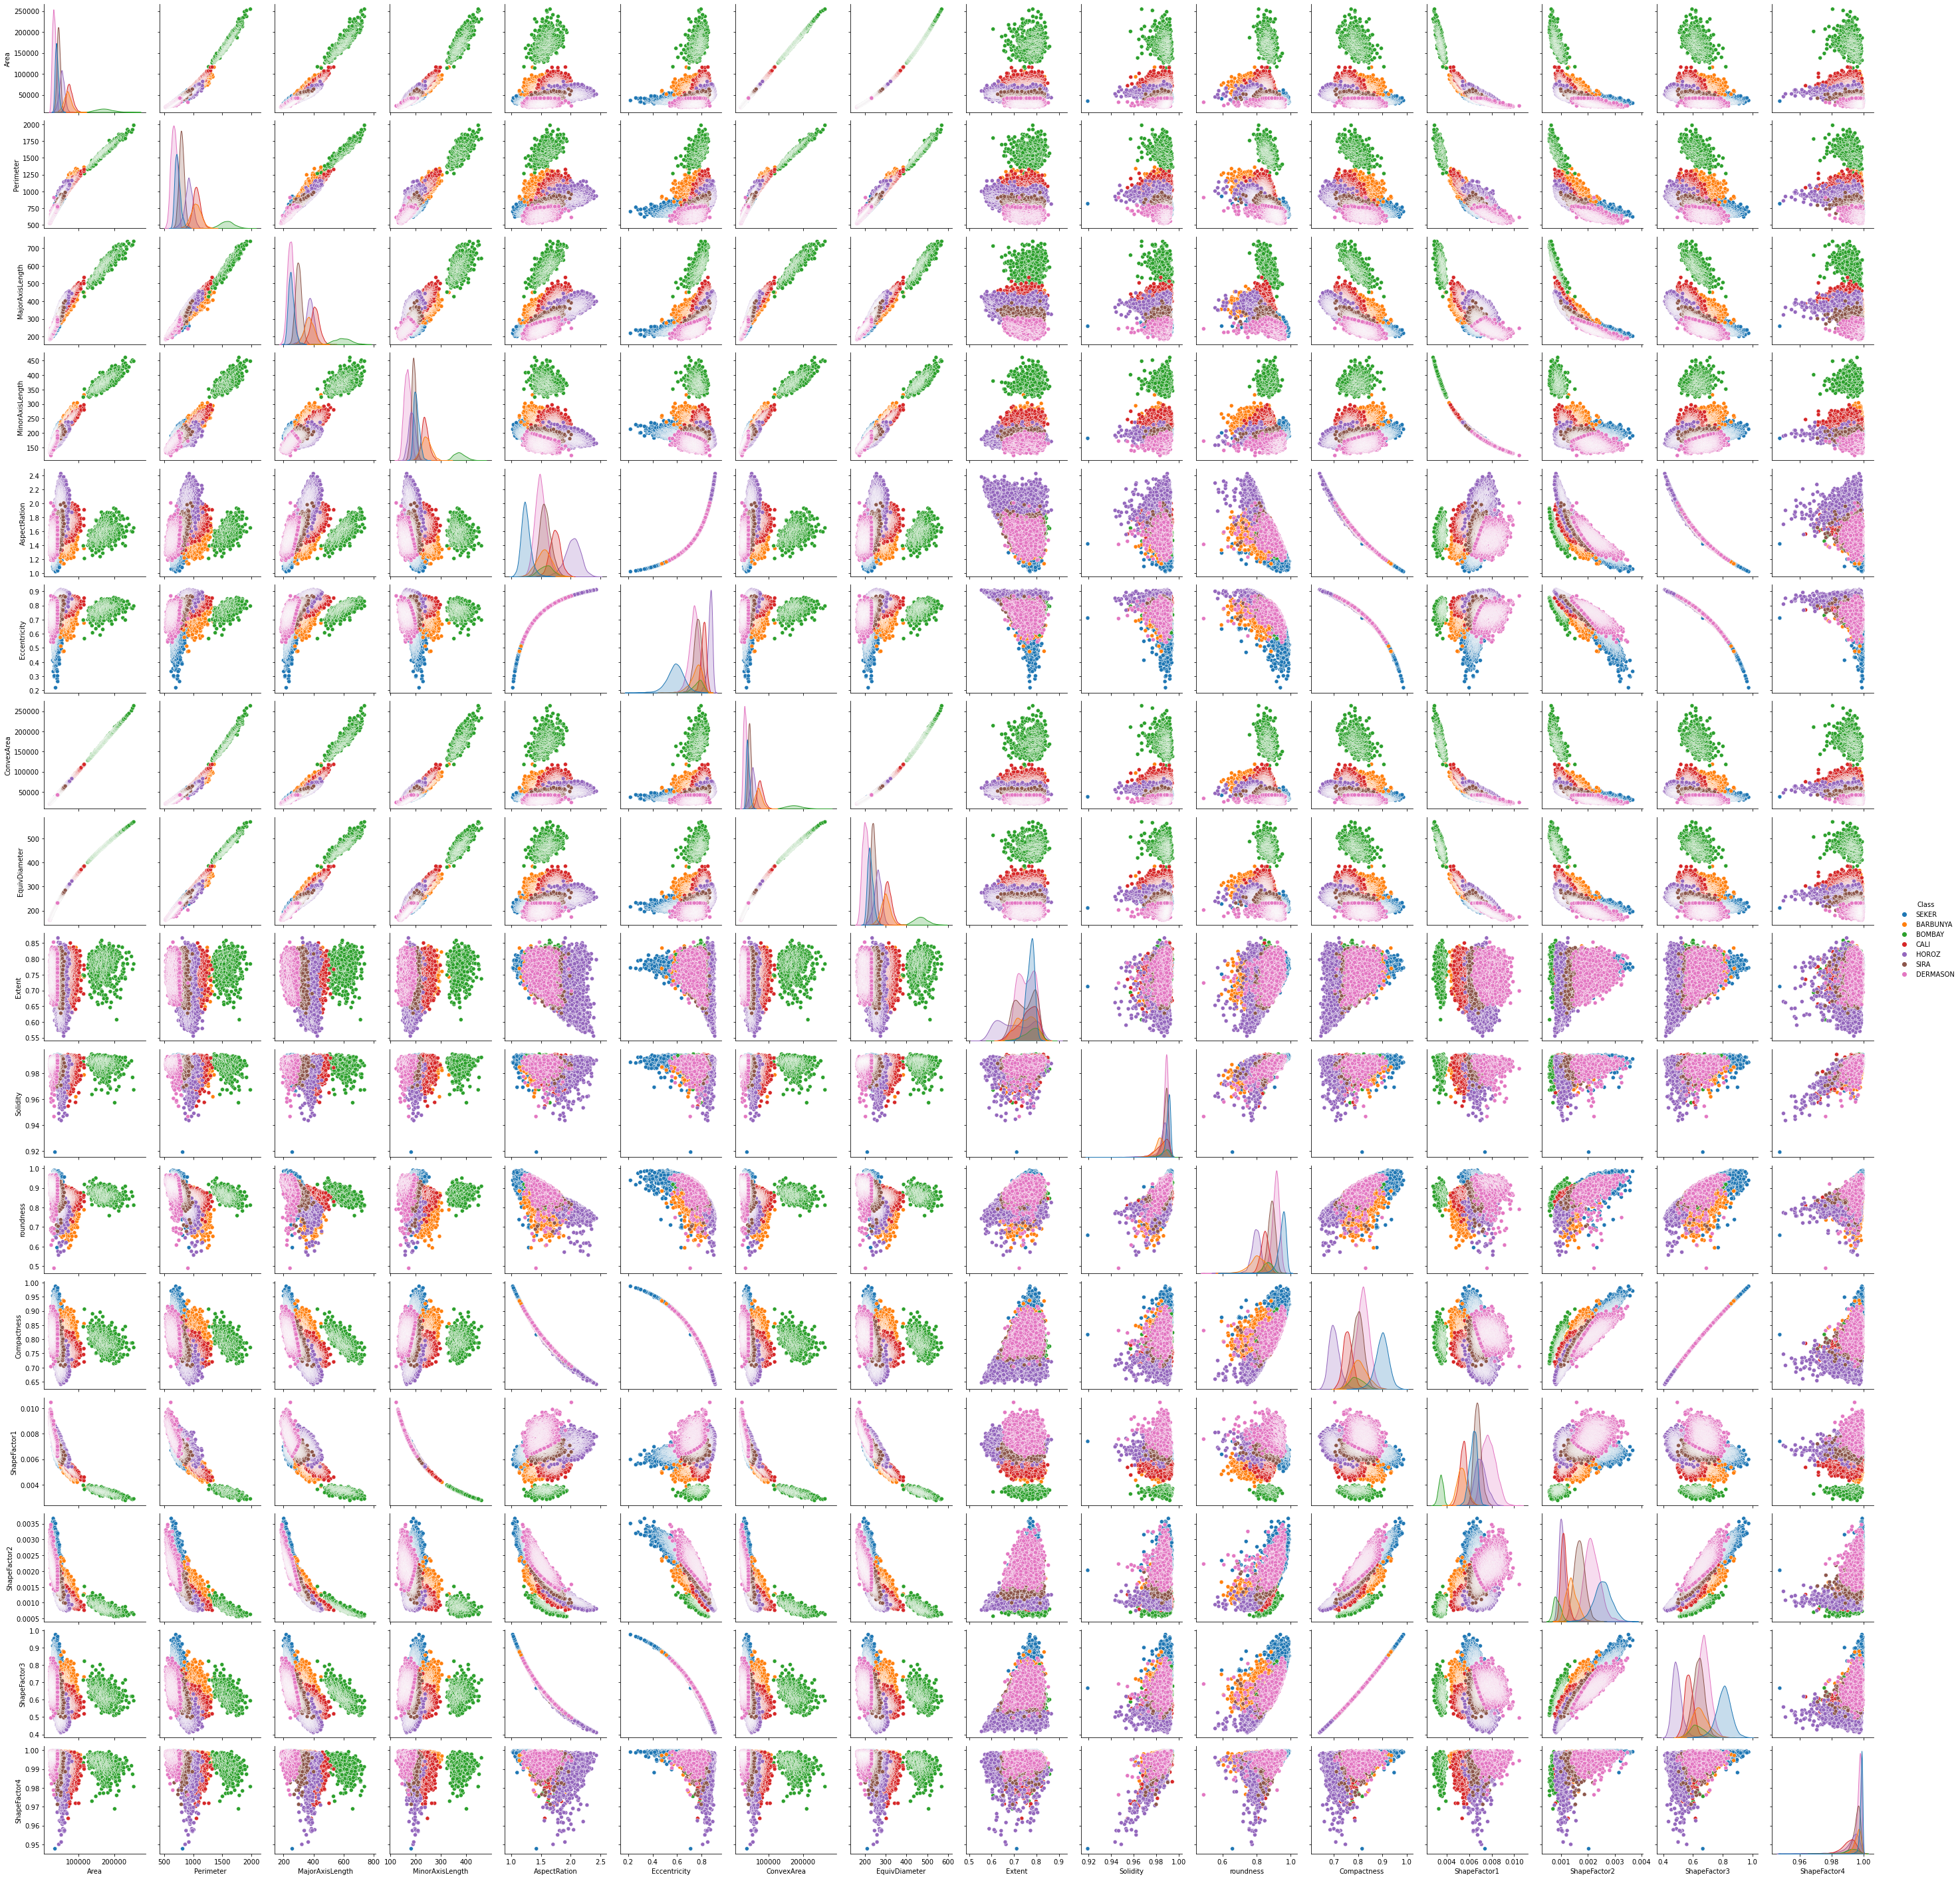

In [71]:
%matplotlib inline
sb.pairplot(df, hue="Class");

From the scatterplot matrix, we can see that:

1. There are 7 classes: Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira. This is what we wanted.
2. There some outliers that may be erroneous:
  - 1 Area entry for Barbunya
  - 1 Perimeter entry for Seker and for Dermason
  - 

### Cleanup data

In [60]:
# Separate the targe label (y) from the data (X)

# "Area", "Perimeter", "MajorAxisLength", "MinorAxisLength", "AspectRation", "Eccentricity",
# "ConvexArea", "EquivDiameter", "Extent", "Solidity", "roundness", "Compactness", 
# "ShapeFactor1", "ShapeFactor2", "ShapeFactor3", "ShapeFactor4", "Class"

# inputs
X = df.drop(["Class"], axis=1)
# target (label)
y = df["Class"]

We have some attributes that are derived (agregation) and others that are highly correlated. We need to take care of those, in order to simplify the model.

#### Attribute correlation

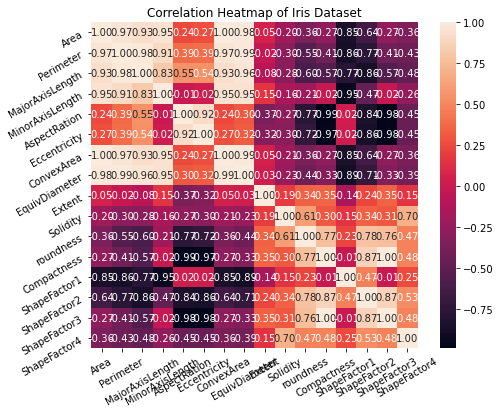

In [77]:
# create correlation matrix
corr_matrix = df.corr();

# create correlation heatmap
plt.figure(figsize=(8,6))
plt.title('Correlation Heatmap of Iris Dataset')
a = sb.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='black');
a.set_xticklabels(a.get_xticklabels(), rotation=30)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show();

In [79]:
# select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper

Area  Perimeter  MajorAxisLength  MinorAxisLength  \
Area              NaN   0.966722         0.931834         0.951602   
Perimeter         NaN        NaN         0.977338         0.913179   
MajorAxisLength   NaN        NaN              NaN         0.826052   
MinorAxisLength   NaN        NaN              NaN              NaN   
AspectRation      NaN        NaN              NaN              NaN   
Eccentricity      NaN        NaN              NaN              NaN   
ConvexArea        NaN        NaN              NaN              NaN   
EquivDiameter     NaN        NaN              NaN              NaN   
Extent            NaN        NaN              NaN              NaN   
Solidity          NaN        NaN              NaN              NaN   
roundness         NaN        NaN              NaN              NaN   
Compactness       NaN        NaN              NaN              NaN   
ShapeFactor1      NaN        NaN              NaN              NaN   
ShapeFactor2      NaN        NaN              NaN              NaN   
ShapeFactor3      NaN        NaN              NaN              NaN   
ShapeFactor4      NaN        NaN              NaN              NaN   

                 AspectRation  Eccentricity  ConvexArea  EquivDiameter  \
Area                 0.241735      0.267481    0.999939       0.984968   
Perimeter            0.385276      0.391066    0.967689       0.991380   
MajorAxisLength      0.550335      0.541972    0.932607       0.961733   
MinorAxisLength     -0.009161      0.019574    0.951339       0.948539   
AspectRation              NaN      0.924293    0.243301       0.303647   
Eccentricity              NaN           NaN    0.269255       0.318667   
ConvexArea                NaN           NaN         NaN       0.985226   
EquivDiameter             NaN           NaN         NaN            NaN   
Extent                    NaN           NaN         NaN            NaN   
Solidity                  NaN           NaN         NaN            NaN   
roundness                 NaN           NaN         NaN            NaN   
Compactness               NaN           NaN         NaN            NaN   
ShapeFactor1              NaN           NaN         NaN            NaN   
ShapeFactor2              NaN           NaN         NaN            NaN   
ShapeFactor3              NaN           NaN         NaN            NaN   
ShapeFactor4              NaN           NaN         NaN            NaN   

                   Extent  Solidity  roundness  Compactness  ShapeFactor1  \
Area             0.054345 -0.196585  -0.357530    -0.268067     -0.847958   
Perimeter       -0.021160 -0.303970  -0.547647    -0.406857     -0.864623   
MajorAxisLength -0.078062 -0.284302  -0.596358    -0.568377     -0.773609   
MinorAxisLength  0.145957 -0.155831  -0.210344    -0.015066     -0.947204   
AspectRation    -0.370184 -0.267754  -0.766979    -0.987687      0.024593   
Eccentricity    -0.319362 -0.297592  -0.722272    -0.970313      0.019920   
ConvexArea       0.052564 -0.206191  -0.362083    -0.269922     -0.847950   
EquivDiameter    0.028383 -0.231648  -0.435945    -0.327650     -0.892741   
Extent                NaN  0.191389   0.344411     0.354212     -0.141616   
Solidity              NaN       NaN   0.607150     0.303766      0.153388   
roundness             NaN       NaN        NaN     0.768086      0.230273   
Compactness           NaN       NaN        NaN          NaN     -0.009394   
ShapeFactor1          NaN       NaN        NaN          NaN           NaN   
ShapeFactor2          NaN       NaN        NaN          NaN           NaN   
ShapeFactor3          NaN       NaN        NaN          NaN           NaN   
ShapeFactor4          NaN       NaN        NaN          NaN           NaN   

                 ShapeFactor2  ShapeFactor3  ShapeFactor4  
Area                -0.639291     -0.272145     -0.355721  
Perimeter           -0.767592     -0.408435     -0.429310  
MajorAxisLength     -0.859238     -0.568185     -0.482527  
MinorAxisLength  

In [80]:
# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print(to_drop)

['Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'ShapeFactor3']


## Divide data

In [73]:
from sklearn.model_selection import train_test_split

# split test and training data (70% train, 30% test)
(X_train, X_test, y_train, y_test) = train_test_split(all_inputs, all_labels, test_size=0.30, random_state=1)

X_train.shape, X_test.shape

((9527, 16), (4084, 16))

In [62]:
from sklearn.tree import DecisionTreeClassifier

# create the classifier
clf = DecisionTreeClassifier()

# train the classifier on the training set
clf.fit(X_train, y_train)

# predict 'Class' for test dataset
y_pred = clf.predict(X_test)

# plot the decision tree
#from sklearn.tree import plot_tree
#plot_tree(clf);

In [68]:
import sklearn.metrics as metrics

def print_metrics(test_labels, pred_labels, avg=None):
    print("Accuracy Score: {}".format(metrics.accuracy_score(test_labels, pred_labels)))
    print("Precision Score: {}".format(metrics.precision_score(test_labels, pred_labels, average=avg)))
    print("Recall Score: {}".format(metrics.recall_score(test_labels, pred_labels, average=avg)))
    print("F1 Score: {}".format(metrics.f1_score(test_labels, pred_labels, average=avg)))
    print("Confusion matrix:\n{}".format(metrics.confusion_matrix(test_labels, pred_labels)))

print_metrics(y_test, y_pred)

Accuracy Score: 0.8915279138099902
Precision Score: [0.88131313 1.         0.92424242 0.88372093 0.91122278 0.93708609
 0.81806775]
Recall Score: [0.89487179 1.         0.8914405  0.89453861 0.93955095 0.91143317
 0.815     ]
F1 Score: [0.88804071 1.         0.90754516 0.88909686 0.92517007 0.92408163
 0.816531  ]
Confusion matrix:
[[349   0  22   1   3   5  10]
 [  0 153   0   0   0   0   0]
 [ 28   0 427   0  16   2   6]
 [  1   0   0 950  11  10  90]
 [  6   0   9   3 544   0  17]
 [  5   0   1  27   0 566  22]
 [  7   0   3  94  23  21 652]]
